In [ ]:
!pwd

/content


In [ ]:
!cd /content/drive/MyDrive/sgx3-codinginstitute-25

In [ ]:
!pwd

/content


In [ ]:
!more ATX-Traffic.csv

Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Addr
ess,Status,Status Date,Agency
F350D780EA8AAA48030B4DB64F790C14DBCD757F_1709688579,03/06/2024 01:29:39 AM +0000
,Stalled Vehicle,POINT (-97.705874 30.32358),30.32358,-97.705874,E 290 Svrd Wb T
o Ih 35 Nb Ramp / N Ih 35 Svrd Sb At E 290 Tr,ARCHIVED,03/06/2024 02:10:12 AM +0
000,AUSTIN PD           
042338D46C2028808F298DEC735DC7ADF0C162F6_1709688402,03/06/2024 01:26:42 AM +0000
,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svr
d Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD           
BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_1708035468,02/15/2024 10:17:48 PM +0000
,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.0578,-97.717911,12400 Glass Rd,AR
CHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF
A5909010064EF753C5F090A07CFCDDFBF25E38F3_1586554271,04/10/2020 09:31:11 PM +0000
,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W E
b & S Sh 45 W 

In [4]:
import pandas as pd

In [8]:
#load the dataset
df = pd.read_csv("Real-Time_Traffic_Incident_Reports_20250611.csv")

In [9]:
# Preview
df.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN


In [10]:
df.shape

(425631, 10)

In [11]:
df.columns

Index(['Traffic Report ID', 'Published Date', 'Issue Reported', 'Location',
       'Latitude', 'Longitude', 'Address', 'Status', 'Status Date', 'Agency'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425631 entries, 0 to 425630
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Traffic Report ID  425631 non-null  object 
 1   Published Date     425631 non-null  object 
 2   Issue Reported     425631 non-null  object 
 3   Location           425366 non-null  object 
 4   Latitude           425552 non-null  float64
 5   Longitude          425552 non-null  float64
 6   Address            425631 non-null  object 
 7   Status             423938 non-null  object 
 8   Status Date        425631 non-null  object 
 9   Agency             69047 non-null   object 
dtypes: float64(2), object(8)
memory usage: 32.5+ MB


In [13]:
df.describe()

,Latitude,Longitude
count,4.255520e+05,425552.000000
mean,5.701792e+03,-97.518362
std,4.110598e+05,4.544997
min,0.000000e+00,-98.816154
25%,3.023067e+01,-97.776077
50%,3.029459e+01,-97.731700
75%,3.037432e+01,-97.680800
max,2.999603e+07,0.000000


In [14]:
unique_issues = df['Issue Reported'].unique()

In [15]:
print(unique_issues)


['Stalled Vehicle' 'Crash Urgent' 'LOOSE LIVESTOCK' 'TRFC HAZD/ DEBRIS'
 'Traffic Hazard' 'COLLISION' 'COLLISION/PRIVATE PROPERTY'
 'FLEET ACC/ INJURY' 'Crash Service' 'COLLISION WITH INJURY'
 'COLLISN/ LVNG SCN' 'zSTALLED VEHICLE' 'BOAT ACCIDENT' 'VEHICLE FIRE'
 'BLOCKED DRIV/ HWY' 'TRAFFIC FATALITY' 'AUTO/ PED' 'Traffic Impediment'
 'N / HZRD TRFC VIOL' 'ICY ROADWAY' 'COLLISN / FTSRA' 'FLEET ACC/ FATAL'
 'OBSTRUCT HWY' 'HIGH WATER']


In [16]:
name = 'Charlie'

In [17]:
print (name)

Charlie


In [18]:
type(name)

str

In [19]:
type(unique_issues)

numpy.ndarray

In [20]:
print (unique_issues.size)

24


In [21]:
df['Issue Reported'].nunique()


24

In [22]:
df['Issue Reported'] == 'Crash Urgent'

0         False
1          True
2         False
3         False
4         False
          ...  
425626    False
425627    False
425628    False
425629    False
425630     True
Name: Issue Reported, Length: 425631, dtype: bool

In [23]:
df[df['Issue Reported'] == 'Crash Urgent']

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD
6,09203A0B810D0C054F3F15D6DB42AA850BEA9174_17096...,03/05/2024 11:34:06 PM +0000,Crash Urgent,POINT (-97.810932 30.475283),30.475283,-97.810932,2787 S Lakeline Blvd,ARCHIVED,03/06/2024 12:25:11 AM +0000,AUSTIN PD
12,9521E2BCC9C0DE945CCF68B52345097002B66BA5_17096...,03/06/2024 02:45:22 AM +0000,Crash Urgent,POINT (-97.774813 30.20489),30.204890,-97.774813,S Congress Ave / W Stassney Ln,ARCHIVED,03/06/2024 03:25:10 AM +0000,AUSTIN PD
14,E90E88C880E48E96024E634381BA1AD4888E72E0_17096...,03/06/2024 02:04:19 AM +0000,Crash Urgent,POINT (-97.760691 30.202818),30.202818,-97.760691,5200 S Ih 35 Sb,ARCHIVED,03/06/2024 02:15:11 AM +0000,AUSTIN PD
17,7FCDB7BA6DE74B6E007EFE1079540E0228817D26_17096...,03/06/2024 02:30:38 AM +0000,Crash Urgent,POINT (-97.696568 30.346648),30.346648,-97.696568,8312 N IH 35 SVRD SB,ARCHIVED,03/06/2024 05:10:12 AM +0000,AUSTIN PD
...,...,...,...,...,...,...,...,...,...,...
425608,823B29FFD8DBAB9367EDDCA53376226A17CDC00F_17496...,06/11/2025 04:44:58 AM +0000,Crash Urgent,POINT (-97.734361 30.191606),30.191606,-97.734361,CHINA BERRY RD / BIRCH CREEK RD,ARCHIVED,06/11/2025 05:01:10 AM +0000,AUSTIN PD
425611,88C79C1DC9D13B2B592B9057730DF504809A43C1_17496...,06/11/2025 05:27:10 AM +0000,Crash Urgent,POINT (-97.752785 30.288622),30.288622,-97.752785,2400-2422 N Lamar Blvd,ARCHIVED,06/11/2025 06:40:15 AM +0000,AUSTIN PD
425616,F4F9DD8C2988666B84167D2D7E58D654A53560A1_17496...,06/11/2025 08:23:02 AM +0000,Crash Urgent,POINT (-97.76064 30.20243),30.202430,-97.760640,5001 S IH 35 NB,ARCHIVED,06/11/2025 09:15:22 AM +0000,AUSTIN PD
425617,FFEEAE89101150B85AC054F8625E928F11D2FBB0_17496...,06/11/2025 07:50:06 AM +0000,Crash Urgent,POINT (-97.816338 30.185877),30.185877,-97.816338,Menchaca Rd / Davis Ln,ARCHIVED,06/11/2025 10:20:13 AM +0000,AUSTIN PD


In [24]:
df['Address'].str.contains('IH 35', na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
425626    False
425627    False
425628    False
425629    False
425630    False
Name: Address, Length: 425631, dtype: bool

In [25]:
df[df['Address'].str.contains('IH 35', na=False)]

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency
17,7FCDB7BA6DE74B6E007EFE1079540E0228817D26_17096...,03/06/2024 02:30:38 AM +0000,Crash Urgent,POINT (-97.696568 30.346648),30.346648,-97.696568,8312 N IH 35 SVRD SB,ARCHIVED,03/06/2024 05:10:12 AM +0000,AUSTIN PD
45,B91F4502A07105CEBCE7E632807B55F7657F988D_17126...,04/09/2024 04:55:22 PM +0000,Crash Service,POINT (-97.770881 30.190674),30.190674,-97.770881,E WILLIAM CANNON DR / S IH 35 SVRD SB,ARCHIVED,04/09/2024 06:30:15 PM +0000,AUSTIN PD
77,58907516874AA70188525B2518FAF0E285FD821A_17104...,03/15/2024 12:38:40 AM +0000,Stalled Vehicle,POINT (-97.674028 30.407178),30.407178,-97.674028,12439-12537 N IH 35 SVRD NB,ARCHIVED,03/15/2024 01:00:16 AM +0000,AUSTIN PD
93,B7341ADE93B73941045D59D28699793EECDF673D_17104...,03/15/2024 12:49:08 AM +0000,COLLISION,POINT (-97.665671 30.453514),30.453514,-97.665671,15700-15827 N IH 35 SVRD NB,ARCHIVED,03/15/2024 01:30:13 AM +0000,TRAVIS COUNTY SHERIF
149,508DE84D9E60D0EA4F80173324A7A9CC95DBEDB3_17122...,04/04/2024 09:57:57 PM +0000,Crash Urgent,POINT (-97.719288 30.295057),30.295057,-97.719288,3800 N IH 35 UPPER DECK NB,ARCHIVED,04/04/2024 11:25:48 PM +0000,AUSTIN PD
...,...,...,...,...,...,...,...,...,...,...
425260,142B577AA1967D757715FA937CC10D50E5814A4A_17493...,06/08/2025 04:50:04 AM +0000,COLLISION,POINT (-97.670877 30.433672),30.433672,-97.670877,14310 N IH 35 SVRD SB,ARCHIVED,06/08/2025 05:15:15 AM +0000,TRAVIS COUNTY SHERIF
425422,6DBB169C06C09B479392E3A636171E8714B46023_17494...,06/09/2025 05:12:24 PM +0000,Crash Urgent,POINT (-97.745657 30.225966),30.225966,-97.745657,3100-3500 S IH 35 NB,ARCHIVED,06/09/2025 05:45:18 PM +0000,AUSTIN PD
425572,7A1B52FD835B0BEBB79168905903AD903FDA01BF_17495...,06/10/2025 07:44:10 PM +0000,Crash Service,POINT (-97.673793 30.414425),30.414425,-97.673793,13000 N IH 35 SVRD SB,ARCHIVED,06/10/2025 09:55:13 PM +0000,AUSTIN PD
425581,7161A2409087E392CF68559DDAC9F1B64B07510C_17495...,06/10/2025 10:18:26 PM +0000,Crash Service,POINT (-97.789085 30.162182),30.162182,-97.789085,9500 S IH 35 SVRD SB,ARCHIVED,06/10/2025 11:25:15 PM +0000,AUSTIN PD


In [27]:
df[(df['Issue Reported'] == 'Crash Urgent') & (df['Address'].str.contains('IH 35', na=False))]

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency
17,7FCDB7BA6DE74B6E007EFE1079540E0228817D26_17096...,03/06/2024 02:30:38 AM +0000,Crash Urgent,POINT (-97.696568 30.346648),30.346648,-97.696568,8312 N IH 35 SVRD SB,ARCHIVED,03/06/2024 05:10:12 AM +0000,AUSTIN PD
149,508DE84D9E60D0EA4F80173324A7A9CC95DBEDB3_17122...,04/04/2024 09:57:57 PM +0000,Crash Urgent,POINT (-97.719288 30.295057),30.295057,-97.719288,3800 N IH 35 UPPER DECK NB,ARCHIVED,04/04/2024 11:25:48 PM +0000,AUSTIN PD
213,5F5898E4726001663BA5A126B313B03B1AED3F07_17097...,03/06/2024 04:59:46 PM +0000,Crash Urgent,POINT (-97.67169 30.423909),30.423909,-97.671690,13600 N IH 35 SB,ARCHIVED,03/06/2024 06:45:25 PM +0000,AUSTIN PD
215,EC10DB9185C9C58A004FA683DD21AFCD16CAD418_17109...,03/20/2024 02:29:08 PM +0000,Crash Urgent,POINT (-97.753967 30.213333),30.213333,-97.753967,S IH 35 SVRD SB / E ST ELMO RD,ARCHIVED,03/20/2024 05:10:26 PM +0000,AUSTIN PD
289,BA2E8AA59E4161EE5807078F7226C405FDE751A6_15609...,06/19/2019 11:26:40 PM +0000,Crash Urgent,POINT (-97.737007 30.256942),30.256942,-97.737007,31-61 N IH 35 NB,ARCHIVED,06/20/2019 01:00:05 AM +0000,NaN
...,...,...,...,...,...,...,...,...,...,...
424567,BF106F603F5A1CA065CB9438FB4EAE247D89AEF3_17488...,06/02/2025 01:16:11 AM +0000,Crash Urgent,POINT (-97.761526 30.201368),30.201368,-97.761526,5400 S IH 35 NB,ARCHIVED,06/02/2025 02:15:15 AM +0000,AUSTIN PD
424688,A02A2FE9596BF1F59BD4CA2ECA3885C814393F10_17489...,06/03/2025 08:00:08 PM +0000,Crash Urgent,POINT (-97.7002 30.338787),30.338787,-97.700200,7400-7801 N IH 35 NB,ARCHIVED,06/03/2025 08:50:19 PM +0000,AUSTIN PD
424723,9304739C29A855AF7DDB1CFC420CB7CF57726E00_17489...,06/03/2025 11:04:56 PM +0000,Crash Urgent,POINT (-97.764564 30.198096),30.198096,-97.764564,5700 S IH 35 SB,ARCHIVED,06/04/2025 12:10:16 AM +0000,AUSTIN PD
425422,6DBB169C06C09B479392E3A636171E8714B46023_17494...,06/09/2025 05:12:24 PM +0000,Crash Urgent,POINT (-97.745657 30.225966),30.225966,-97.745657,3100-3500 S IH 35 NB,ARCHIVED,06/09/2025 05:45:18 PM +0000,AUSTIN PD


In [28]:
df['year'] = df['Published Date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [30]:
df.dtypes

Traffic Report ID     object
Published Date        object
Issue Reported        object
Location              object
Latitude             float64
Longitude            float64
Address               object
Status                object
Status Date           object
Agency                object
dtype: object

In [31]:
df['date'] = pd.to_datetime(df['Published Date'])

In [32]:
df.columns

Index(['Traffic Report ID', 'Published Date', 'Issue Reported', 'Location',
       'Latitude', 'Longitude', 'Address', 'Status', 'Status Date', 'Agency',
       'date'],
      dtype='object')

In [34]:
df.dtypes

Traffic Report ID                 object
Published Date                    object
Issue Reported                    object
Location                          object
Latitude                         float64
Longitude                        float64
Address                           object
Status                            object
Status Date                       object
Agency                            object
date                 datetime64[ns, UTC]
dtype: object

In [35]:
df['year'] = df['date'].dt.year

In [36]:
df.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,2024-03-06 01:29:39+00:00,2024
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,2024-03-06 01:26:42+00:00,2024
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF,2024-02-15 22:17:48+00:00,2024
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,2020-04-10 21:31:11+00:00,2020
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,2022-06-04 17:51:05+00:00,2022


In [37]:
len(df[(df['Issue Reported'] == 'Traffic Hazard') & (df['year'] == 2023)])

14061

In [38]:
df[(df['Issue Reported'] == 'Traffic Hazard') & (df['year'] == 2024)].shape[0]

12644

In [39]:
def square(x):
  return x*x

In [40]:
a = square(2)

In [41]:
print (a)

4


In [42]:
a = lambda x: x*x

In [43]:
print (a(5))

25


In [44]:
print (a(25))

625


In [45]:
df['Issue Lower'] = df['Issue Reported'].apply
(lambda x: x.lower() if pd.notnull(x) else x)


<function __main__.<lambda>(x)>

In [46]:
df.columns

Index(['Traffic Report ID', 'Published Date', 'Issue Reported', 'Location',
       'Latitude', 'Longitude', 'Address', 'Status', 'Status Date', 'Agency',
       'date', 'year', 'Issue Lower'],
      dtype='object')

In [47]:
df.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,2024-03-06 01:29:39+00:00,2024,<bound method Series.apply of 0 Stal...
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,2024-03-06 01:26:42+00:00,2024,<bound method Series.apply of 0 Stal...
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF,2024-02-15 22:17:48+00:00,2024,<bound method Series.apply of 0 Stal...
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,2020-04-10 21:31:11+00:00,2020,<bound method Series.apply of 0 Stal...
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,2022-06-04 17:51:05+00:00,2022,<bound method Series.apply of 0 Stal...


In [49]:
df.dtypes

Traffic Report ID                 object
Published Date                    object
Issue Reported                    object
Location                          object
Latitude                         float64
Longitude                        float64
Address                           object
Status                            object
Status Date                       object
Agency                            object
date                 datetime64[ns, UTC]
year                               int32
Issue Lower                       object
dtype: object

In [50]:
df['Issue Reported'] = df['Issue Reported'].astype('string')

In [51]:
df.dtypes

Traffic Report ID                 object
Published Date                    object
Issue Reported            string[python]
Location                          object
Latitude                         float64
Longitude                        float64
Address                           object
Status                            object
Status Date                       object
Agency                            object
date                 datetime64[ns, UTC]
year                               int32
Issue Lower                       object
dtype: object

In [54]:
df['Issue Lower'] = df['Issue Reported'].apply
(lambda x: x.lower() if pd.notnull(x) else x)

<function __main__.<lambda>(x)>

In [55]:
df.dtypes

Traffic Report ID                 object
Published Date                    object
Issue Reported            string[python]
Location                          object
Latitude                         float64
Longitude                        float64
Address                           object
Status                            object
Status Date                       object
Agency                            object
date                 datetime64[ns, UTC]
year                               int32
Issue Lower                       object
dtype: object

In [56]:
df.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,2024-03-06 01:29:39+00:00,2024,<bound method Series.apply of 0 Stal...
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,2024-03-06 01:26:42+00:00,2024,<bound method Series.apply of 0 Stal...
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF,2024-02-15 22:17:48+00:00,2024,<bound method Series.apply of 0 Stal...
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,2020-04-10 21:31:11+00:00,2020,<bound method Series.apply of 0 Stal...
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,2022-06-04 17:51:05+00:00,2022,<bound method Series.apply of 0 Stal...


In [57]:
print (df['Issue Reported'])

0           Stalled Vehicle
1              Crash Urgent
2           LOOSE LIVESTOCK
3         TRFC HAZD/ DEBRIS
4            Traffic Hazard
                ...        
425626       Traffic Hazard
425627    TRFC HAZD/ DEBRIS
425628            COLLISION
425629        Crash Service
425630         Crash Urgent
Name: Issue Reported, Length: 425631, dtype: string


In [58]:
print (df['Issue Reported'])

0           Stalled Vehicle
1              Crash Urgent
2           LOOSE LIVESTOCK
3         TRFC HAZD/ DEBRIS
4            Traffic Hazard
                ...        
425626       Traffic Hazard
425627    TRFC HAZD/ DEBRIS
425628            COLLISION
425629        Crash Service
425630         Crash Urgent
Name: Issue Reported, Length: 425631, dtype: string


In [59]:
print (name)

Charlie


In [60]:
print (name.lower())

charlie


In [61]:
print (df['Issue Reported'].str.lower())

0           stalled vehicle
1              crash urgent
2           loose livestock
3         trfc hazd/ debris
4            traffic hazard
                ...        
425626       traffic hazard
425627    trfc hazd/ debris
425628            collision
425629        crash service
425630         crash urgent
Name: Issue Reported, Length: 425631, dtype: string


In [62]:
df['Issue Lower'] = df['Issue Reported'].apply(lambda x:x.lower())

In [63]:
df.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,2024-03-06 01:29:39+00:00,2024,stalled vehicle
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,2024-03-06 01:26:42+00:00,2024,crash urgent
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF,2024-02-15 22:17:48+00:00,2024,loose livestock
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,2020-04-10 21:31:11+00:00,2020,trfc hazd/ debris
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,2022-06-04 17:51:05+00:00,2022,traffic hazard


In [64]:
df['Issue Lower'] = df['Issue Reported'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [68]:
df.groupby('Issue Reported').size().sort_values(ascending=False).head(10)

Issue Reported
Traffic Hazard           125946
Crash Urgent             103763
Crash Service             58455
COLLISION                 44029
TRFC HAZD/ DEBRIS         32651
LOOSE LIVESTOCK           11481
COLLISION WITH INJURY     11231
Stalled Vehicle            9224
zSTALLED VEHICLE           8930
COLLISN/ LVNG SCN          8517
dtype: int64

In [69]:
df['Date'] = pd.to_datetime(df['Published Date'])
df['Month'] = df['Date'].dt.month
monthly_counts = df.groupby('Month').size()


In [71]:
print (monthly_counts)

Month
1     32557
2     35017
3     36859
4     35927
5     39608
6     33869
7     31769
8     33867
9     33463
10    40286
11    37173
12    35236
dtype: int64


In [72]:
df.groupby('Issue Reported')['Traffic Report ID'].count()


Issue Reported
AUTO/ PED                        180
BLOCKED DRIV/ HWY                938
BOAT ACCIDENT                    136
COLLISION                      44029
COLLISION WITH INJURY          11231
COLLISION/PRIVATE PROPERTY      1886
COLLISN / FTSRA                    1
COLLISN/ LVNG SCN               8517
Crash Service                  58455
Crash Urgent                  103763
FLEET ACC/ FATAL                   3
FLEET ACC/ INJURY                 61
HIGH WATER                         6
ICY ROADWAY                       78
LOOSE LIVESTOCK                11481
N / HZRD TRFC VIOL                13
OBSTRUCT HWY                      15
Stalled Vehicle                 9224
TRAFFIC FATALITY                 128
TRFC HAZD/ DEBRIS              32651
Traffic Hazard                125946
Traffic Impediment              6255
VEHICLE FIRE                    1704
zSTALLED VEHICLE                8930
Name: Traffic Report ID, dtype: int64

In [73]:
df.sort_values(by='Published Date', ascending=False).head()


,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower,Date,Month
407590,D0A54D25D6D76D15DAA175979EDA75CD9FD411B3_17356...,12/31/2024 12:59:27 AM +0000,Traffic Hazard,POINT (-97.771507 30.360904),30.360904,-97.771507,Far West Blvd / North Hills Dr,ARCHIVED,12/31/2024 01:05:15 AM +0000,AUSTIN PD,2024-12-31 00:59:27+00:00,2024,traffic hazard,2024-12-31 00:59:27+00:00,12
407589,78AE9F6E6A12A1AF3C5A87F0F649F73AA2B4C7BE_17356...,12/31/2024 12:56:51 AM +0000,Traffic Hazard,NaN,0.000000,0.000000,2121 ALLANDALE,ARCHIVED,12/31/2024 01:05:15 AM +0000,AUSTIN PD,2024-12-31 00:56:51+00:00,2024,traffic hazard,2024-12-31 00:56:51+00:00,12
407632,9D758147F7E39A4CB91081AB512FEC6385AA6E80_17356...,12/31/2024 12:56:10 PM +0000,COLLISION,POINT (-97.861719 30.318203),30.318203,-97.861719,FM 2244 RD / S MARLY WAY,ARCHIVED,12/31/2024 01:15:18 PM +0000,TRAVIS COUNTY SHERIF,2024-12-31 12:56:10+00:00,2024,collision,2024-12-31 12:56:10+00:00,12
407594,88308D640F3031B16B0E9C4663716C0CB7169E50_17356...,12/31/2024 12:54:46 AM +0000,Crash Urgent,POINT (-97.6026 30.336842),30.336842,-97.602600,8011-8217 BLUE GOOSE RD,ARCHIVED,12/31/2024 01:30:17 AM +0000,AUSTIN PD,2024-12-31 00:54:46+00:00,2024,crash urgent,2024-12-31 00:54:46+00:00,12
407576,08BABBA456D31986A0E6B7A77F63A6D11CC82FC3_17356...,12/31/2024 12:52:00 AM +0000,TRFC HAZD/ DEBRIS,POINT (-97.641064 30.156156),30.156156,-97.641064,ROSS RD / ELROY RD,ARCHIVED,12/31/2024 01:00:18 AM +0000,TRAVIS COUNTY SHERIF,2024-12-31 00:52:00+00:00,2024,trfc hazd/ debris,2024-12-31 00:52:00+00:00,12


In [74]:
crash_urgent = df[df['Issue Reported'] == 'Crash Urgent']
crash_urgent.groupby('Month').size().sort_values(ascending=False)


Month
10    10059
11     9408
5      9334
3      9063
12     9026
4      8652
2      8615
1      8310
6      7982
9      7980
8      7822
7      7512
dtype: int64

In [75]:
looselivestock = df[df['Issue Reported'] == 'LOOSE LIVESTOCK']
looselivestock.groupby('Month').size().sort_values(ascending=False)


Month
9     1132
5     1088
10    1066
7     1019
11    1012
8     1007
3      921
6      875
4      871
12     841
1      827
2      822
dtype: int64

In [76]:
import matplotlib.pyplot as plt

In [77]:
# Inline plotting
%matplotlib inline


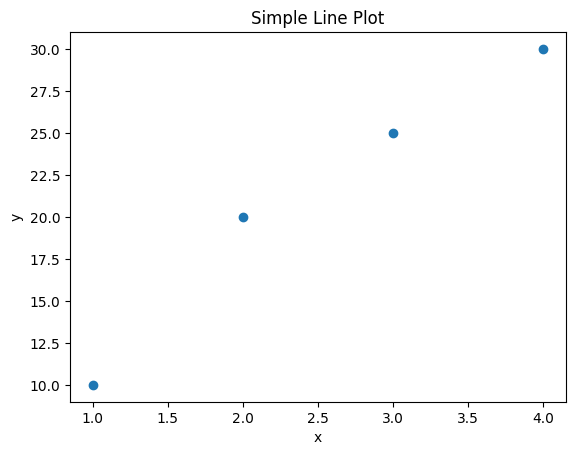

In [80]:
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

plt.scatter(x, y)
plt.title("Simple Line Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [79]:
df.describe()

,Latitude,Longitude,year,Month
count,4.255520e+05,425552.000000,425631.000000,425631.000000
mean,5.701792e+03,-97.518362,2020.822356,6.548421
std,4.110598e+05,4.544997,2.294282,3.452032
min,0.000000e+00,-98.816154,2017.000000,1.000000
25%,3.023067e+01,-97.776077,2019.000000,4.000000
50%,3.029459e+01,-97.731700,2021.000000,6.000000
75%,3.037432e+01,-97.680800,2023.000000,10.000000
max,2.999603e+07,0.000000,2025.000000,12.000000


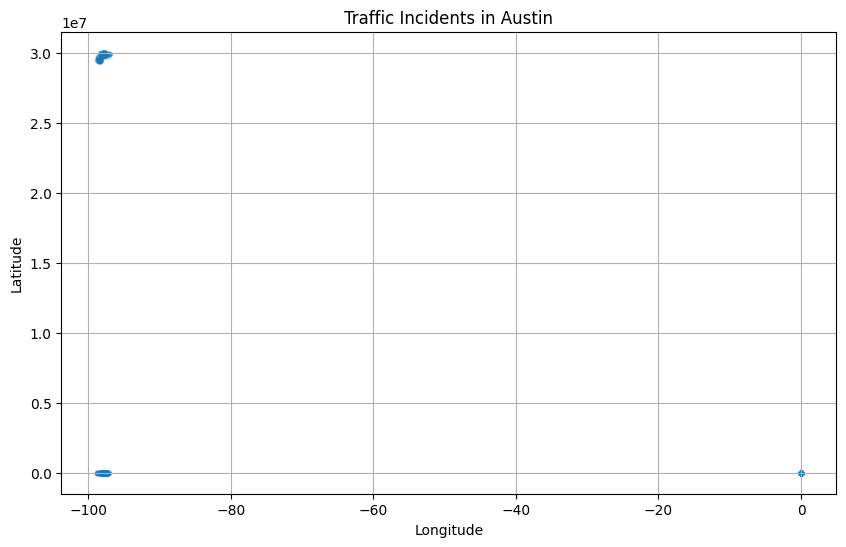

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=.3, s=10)
plt.title("Traffic Incidents in Austin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [86]:
df = df[(df['Latitude'] != 0)]
df = df[(df['Longitude'] != 0)]
df = df[(df['Latitude'] <= 35)]

In [87]:
df.describe()

,Latitude,Longitude,year,Month
count,424549.000000,424549.000000,424549.000000,424549.000000
mean,30.301379,-97.730060,2020.822280,6.548775
std,0.095631,0.090655,2.293969,3.451908
min,30.000064,-98.816154,2017.000000,1.000000
25%,30.231024,-97.776249,2019.000000,4.000000
50%,30.294980,-97.731838,2021.000000,6.000000
75%,30.374485,-97.681400,2023.000000,10.000000
max,31.077333,-97.108986,2025.000000,12.000000


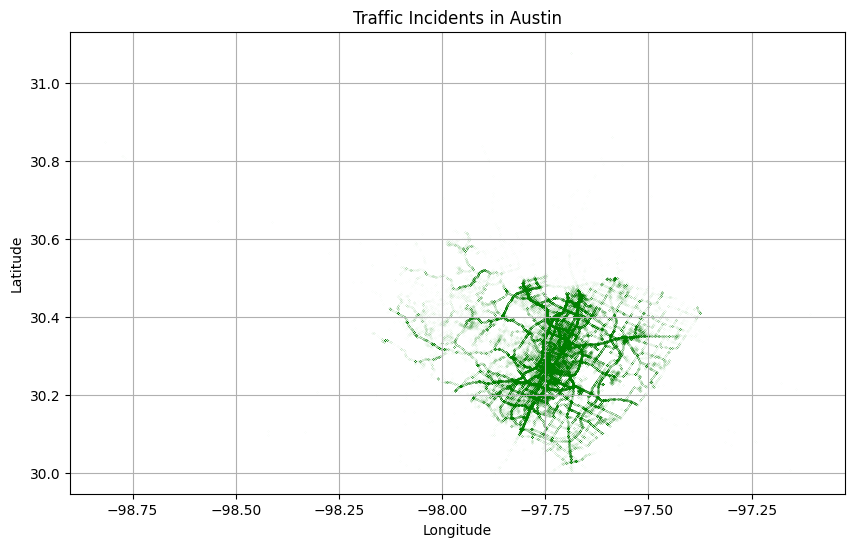

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=.3, s=.001, c='green')
plt.title("Traffic Incidents in Austin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [99]:
df_crashurgent = df[(df["Issue Reported"] == "Crash Urgent")]
df_looselivestock = df[(df["Issue Reported"] == "LOOSE LIVESTOCK"]

In [98]:
df.columns

Index(['Traffic Report ID', 'Published Date', 'Issue Reported', 'Location',
       'Latitude', 'Longitude', 'Address', 'Status', 'Status Date', 'Agency',
       'date', 'year', 'Issue Lower', 'Date', 'Month'],
      dtype='object')

In [106]:
# Get top 5 most common issues
top_issues = df['Issue Reported'].value_counts().head(5).index.tolist()

# Filter dataset to only include these top 5
df_top_issues = df[df['Issue Reported'].isin(top_issues)].copy()


In [107]:
top_issues

['Traffic Hazard',
 'Crash Urgent',
 'Crash Service',
 'COLLISION',
 'TRFC HAZD/ DEBRIS']

In [108]:
df_top_issues

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower,Date,Month
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,2024-03-06 01:26:42+00:00,2024,crash urgent,2024-03-06 01:26:42+00:00,3
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,2020-04-10 21:31:11+00:00,2020,trfc hazd/ debris,2020-04-10 21:31:11+00:00,4
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,2022-06-04 17:51:05+00:00,2022,traffic hazard,2022-06-04 17:51:05+00:00,6
5,388082EEB5EE93B2E562236F9D37CD0B5D74F08E_17096...,03/06/2024 01:35:18 AM +0000,COLLISION,POINT (-97.823787 30.139435),30.139435,-97.823787,665 W FM 1626 TO STATION,ARCHIVED,03/06/2024 02:35:11 AM +0000,TRAVIS COUNTY SHERIF,2024-03-06 01:35:18+00:00,2024,collision,2024-03-06 01:35:18+00:00,3
6,09203A0B810D0C054F3F15D6DB42AA850BEA9174_17096...,03/05/2024 11:34:06 PM +0000,Crash Urgent,POINT (-97.810932 30.475283),30.475283,-97.810932,2787 S Lakeline Blvd,ARCHIVED,03/06/2024 12:25:11 AM +0000,AUSTIN PD,2024-03-05 23:34:06+00:00,2024,crash urgent,2024-03-05 23:34:06+00:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425626,6B6D41EB529DB021F57A81B33FDFD65D296485DA_17496...,06/11/2025 12:35:46 PM +0000,Traffic Hazard,POINT (-97.797683 30.176779),30.176779,-97.797683,8400-8598 S 1ST ST,ARCHIVED,06/11/2025 01:15:18 PM +0000,AUSTIN PD,2025-06-11 12:35:46+00:00,2025,traffic hazard,2025-06-11 12:35:46+00:00,6
425627,322D4D7214A6E86E667EFE2B0064225A8882B628_17496...,06/11/2025 01:20:38 PM +0000,TRFC HAZD/ DEBRIS,POINT (-98.023904 30.371624),30.371624,-98.023904,Lakehurst Loop / Lakehurst Rd,ACTIVE,06/11/2025 01:25:20 PM +0000,TRAVIS COUNTY SHERIF,2025-06-11 13:20:38+00:00,2025,trfc hazd/ debris,2025-06-11 13:20:38+00:00,6
425628,2F25DF3260BA7F6F5DC9556417C6FCE5FCA5C90B_17496...,06/11/2025 01:23:23 PM +0000,COLLISION,POINT (-97.658652 30.324063),30.324063,-97.658652,8000-8113 Tuscany Way,ACTIVE,06/11/2025 01:25:20 PM +0000,TRAVIS COUNTY SHERIF,2025-06-11 13:23:23+00:00,2025,collision,2025-06-11 13:23:23+00:00,6
425629,EA0A27268C155F17DC639A67B1AB97CCB5165233_17496...,06/11/2025 12:24:48 PM +0000,Crash Service,POINT (-97.696558 30.190119),30.190119,-97.696558,7708 Burleson Rd,ARCHIVED,06/11/2025 01:30:26 PM +0000,AUSTIN PD,2025-06-11 12:24:48+00:00,2025,crash service,2025-06-11 12:24:48+00:00,6


In [109]:
# Assign a color to each issue type
issue_colors = {
    top_issues[0]: 'red',
    top_issues[1]: 'orange',
    top_issues[2]: 'green',
    top_issues[3]: 'blue',
    top_issues[4]: 'purple',
}


In [110]:
# Map color values
df_top_issues['Color'] = df_top_issues['Issue Reported'].map(issue_colors)


In [111]:
df_top_issues

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower,Date,Month,Color
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,2024-03-06 01:26:42+00:00,2024,crash urgent,2024-03-06 01:26:42+00:00,3,orange
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,2020-04-10 21:31:11+00:00,2020,trfc hazd/ debris,2020-04-10 21:31:11+00:00,4,purple
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,2022-06-04 17:51:05+00:00,2022,traffic hazard,2022-06-04 17:51:05+00:00,6,red
5,388082EEB5EE93B2E562236F9D37CD0B5D74F08E_17096...,03/06/2024 01:35:18 AM +0000,COLLISION,POINT (-97.823787 30.139435),30.139435,-97.823787,665 W FM 1626 TO STATION,ARCHIVED,03/06/2024 02:35:11 AM +0000,TRAVIS COUNTY SHERIF,2024-03-06 01:35:18+00:00,2024,collision,2024-03-06 01:35:18+00:00,3,blue
6,09203A0B810D0C054F3F15D6DB42AA850BEA9174_17096...,03/05/2024 11:34:06 PM +0000,Crash Urgent,POINT (-97.810932 30.475283),30.475283,-97.810932,2787 S Lakeline Blvd,ARCHIVED,03/06/2024 12:25:11 AM +0000,AUSTIN PD,2024-03-05 23:34:06+00:00,2024,crash urgent,2024-03-05 23:34:06+00:00,3,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425626,6B6D41EB529DB021F57A81B33FDFD65D296485DA_17496...,06/11/2025 12:35:46 PM +0000,Traffic Hazard,POINT (-97.797683 30.176779),30.176779,-97.797683,8400-8598 S 1ST ST,ARCHIVED,06/11/2025 01:15:18 PM +0000,AUSTIN PD,2025-06-11 12:35:46+00:00,2025,traffic hazard,2025-06-11 12:35:46+00:00,6,red
425627,322D4D7214A6E86E667EFE2B0064225A8882B628_17496...,06/11/2025 01:20:38 PM +0000,TRFC HAZD/ DEBRIS,POINT (-98.023904 30.371624),30.371624,-98.023904,Lakehurst Loop / Lakehurst Rd,ACTIVE,06/11/2025 01:25:20 PM +0000,TRAVIS COUNTY SHERIF,2025-06-11 13:20:38+00:00,2025,trfc hazd/ debris,2025-06-11 13:20:38+00:00,6,purple
425628,2F25DF3260BA7F6F5DC9556417C6FCE5FCA5C90B_17496...,06/11/2025 01:23:23 PM +0000,COLLISION,POINT (-97.658652 30.324063),30.324063,-97.658652,8000-8113 Tuscany Way,ACTIVE,06/11/2025 01:25:20 PM +0000,TRAVIS COUNTY SHERIF,2025-06-11 13:23:23+00:00,2025,collision,2025-06-11 13:23:23+00:00,6,blue
425629,EA0A27268C155F17DC639A67B1AB97CCB5165233_17496...,06/11/2025 12:24:48 PM +0000,Crash Service,POINT (-97.696558 30.190119),30.190119,-97.696558,7708 Burleson Rd,ARCHIVED,06/11/2025 01:30:26 PM +0000,AUSTIN PD,2025-06-11 12:24:48+00:00,2025,crash service,2025-06-11 12:24:48+00:00,6,green


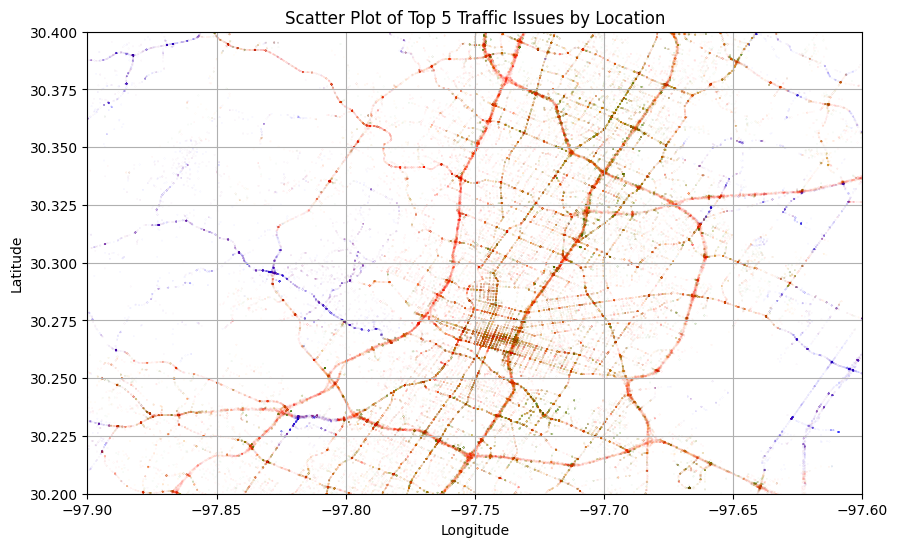

In [113]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_top_issues['Longitude'], 
    df_top_issues['Latitude'], 
    c=df_top_issues['Color'], 
    alpha=0.5, 
    s=.001
)
plt.title("Scatter Plot of Top 5 Traffic Issues by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.xlim(-97.9, -97.6)
plt.ylim(30.2, 30.4)
plt.show()


In [115]:
plt.hist(df['hour'], bins=24, color='orange', edgecolor='black')
plt.title("Incidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()


KeyError: 'hour'

In [117]:
df.dtypes

Traffic Report ID                 object
Published Date                    object
Issue Reported            string[python]
Location                          object
Latitude                         float64
Longitude                        float64
Address                           object
Status                            object
Status Date                       object
Agency                            object
date                 datetime64[ns, UTC]
year                               int32
Issue Lower                       object
Date                 datetime64[ns, UTC]
Month                              int32
dtype: object

In [118]:
df.head(5)

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower,Date,Month
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,2024-03-06 01:29:39+00:00,2024,stalled vehicle,2024-03-06 01:29:39+00:00,3
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,2024-03-06 01:26:42+00:00,2024,crash urgent,2024-03-06 01:26:42+00:00,3
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF,2024-02-15 22:17:48+00:00,2024,loose livestock,2024-02-15 22:17:48+00:00,2
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,2020-04-10 21:31:11+00:00,2020,trfc hazd/ debris,2020-04-10 21:31:11+00:00,4
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,2022-06-04 17:51:05+00:00,2022,traffic hazard,2022-06-04 17:51:05+00:00,6


In [119]:
df['Hour'] = df['Date'].dt.hour


In [120]:
df.dtypes

Traffic Report ID                 object
Published Date                    object
Issue Reported            string[python]
Location                          object
Latitude                         float64
Longitude                        float64
Address                           object
Status                            object
Status Date                       object
Agency                            object
date                 datetime64[ns, UTC]
year                               int32
Issue Lower                       object
Date                 datetime64[ns, UTC]
Month                              int32
Hour                               int32
dtype: object

In [121]:
df.head(5)

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower,Date,Month,Hour
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,2024-03-06 01:29:39+00:00,2024,stalled vehicle,2024-03-06 01:29:39+00:00,3,1
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,2024-03-06 01:26:42+00:00,2024,crash urgent,2024-03-06 01:26:42+00:00,3,1
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF,2024-02-15 22:17:48+00:00,2024,loose livestock,2024-02-15 22:17:48+00:00,2,22
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,2020-04-10 21:31:11+00:00,2020,trfc hazd/ debris,2020-04-10 21:31:11+00:00,4,21
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,2022-06-04 17:51:05+00:00,2022,traffic hazard,2022-06-04 17:51:05+00:00,6,17


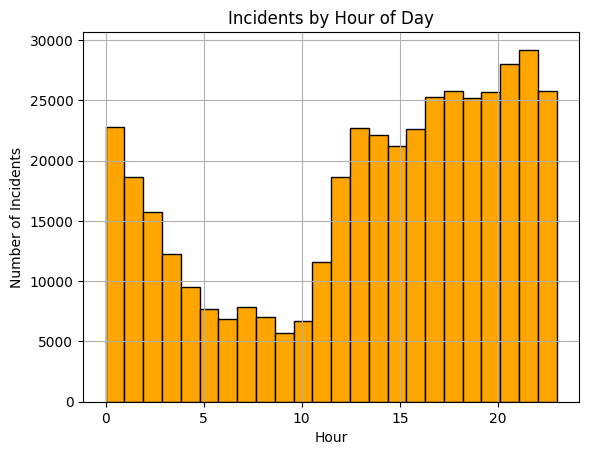

In [122]:
plt.hist(df['Hour'], bins=24, color='orange', edgecolor='black')
plt.title("Incidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()


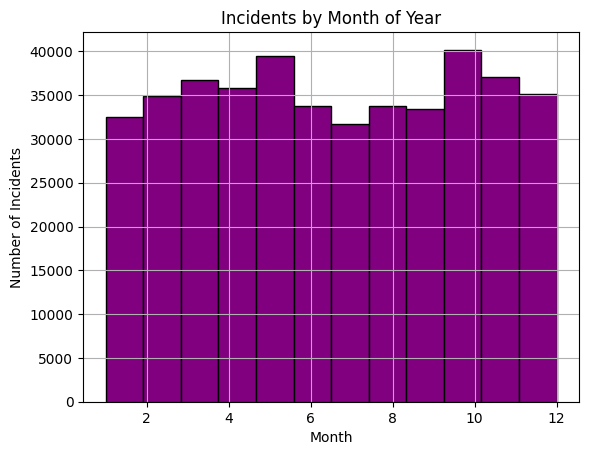

In [124]:
plt.hist(df['Month'], bins=12, color='purple', edgecolor='black')
plt.title("Incidents by Month of Year")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()


In [125]:
top_issues = df['Issue Reported'].value_counts().head(5)

In [126]:
type(top_issues)

pandas.core.series.Series

In [127]:
type(df)

pandas.core.frame.DataFrame

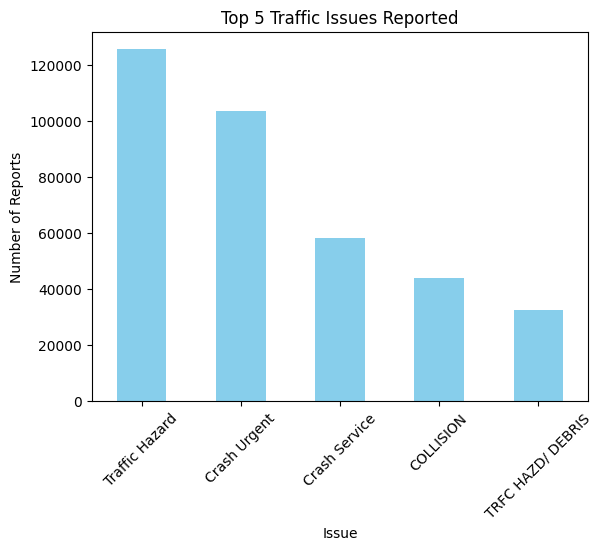

In [130]:
top_issues.plot(kind='bar', color='skyblue')
plt.title("Top 5 Traffic Issues Reported")
plt.xlabel("Issue")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45)
plt.show()


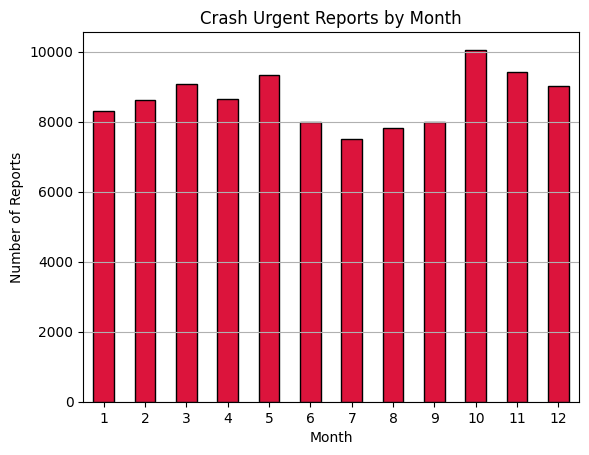

In [133]:
# Filter just 'Crash Urgent' reports
crash_df = df[df['Issue Reported'] == 'Crash Urgent']

#Group by month and count
monthly_crashes = crash_df.groupby('Month').size()
monthly_crashes.plot(kind='bar', color='crimson', edgecolor='black')
plt.title("Crash Urgent Reports by Month")
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


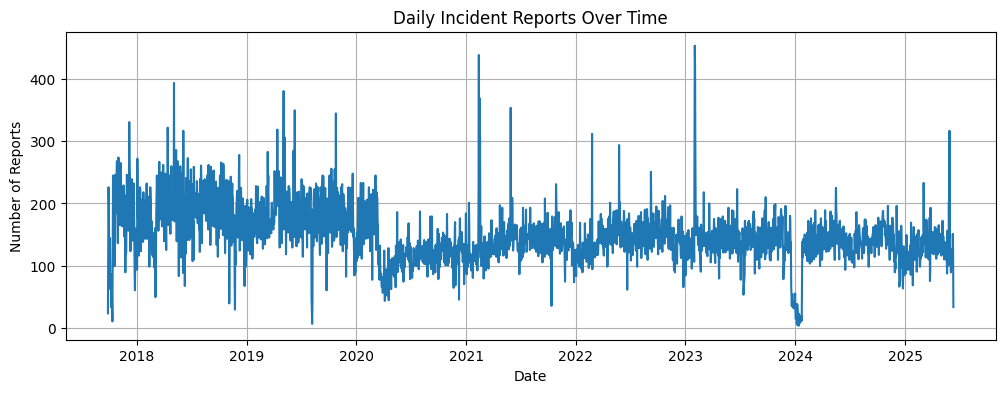

In [138]:
daily_counts = df.groupby(df['Date'].dt.date).size()
daily_counts.plot(figsize=(12, 4), title="Daily Incident Reports Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reports")
plt.grid(True)
plt.show()



In [136]:
df.dtypes

Traffic Report ID                 object
Published Date                    object
Issue Reported            string[python]
Location                          object
Latitude                         float64
Longitude                        float64
Address                           object
Status                            object
Status Date                       object
Agency                            object
date                 datetime64[ns, UTC]
year                               int32
Issue Lower                       object
Date                 datetime64[ns, UTC]
Month                              int32
Hour                               int32
dtype: object

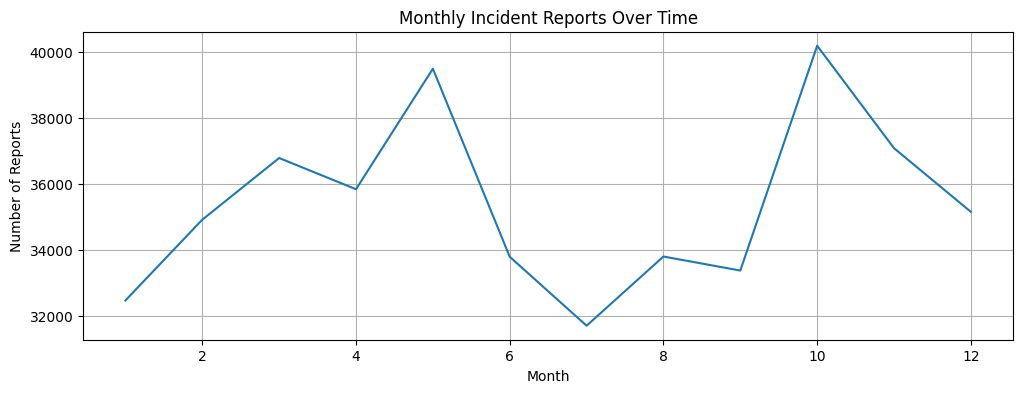

In [140]:
monthly_counts = df.groupby(df['Month']).size()
monthly_counts.plot(figsize=(12, 4), title="Monthly Incident Reports Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.grid(True)
plt.show()



In [141]:
df['Week'] = df['Date'].dt.isocalendar().week

In [142]:
df.dtypes

Traffic Report ID                 object
Published Date                    object
Issue Reported            string[python]
Location                          object
Latitude                         float64
Longitude                        float64
Address                           object
Status                            object
Status Date                       object
Agency                            object
date                 datetime64[ns, UTC]
year                               int32
Issue Lower                       object
Date                 datetime64[ns, UTC]
Month                              int32
Hour                               int32
Week                              UInt32
dtype: object

In [143]:
df.head(5)

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower,Date,Month,Hour,Week
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,2024-03-06 01:29:39+00:00,2024,stalled vehicle,2024-03-06 01:29:39+00:00,3,1,10
1,042338D46C2028808F298DEC735DC7ADF0C162F6_17096...,03/06/2024 01:26:42 AM +0000,Crash Urgent,POINT (-97.698567 30.342505),30.342505,-97.698567,8024 N Ih 35 Svrd Sb,ARCHIVED,03/06/2024 02:45:13 AM +0000,AUSTIN PD,2024-03-06 01:26:42+00:00,2024,crash urgent,2024-03-06 01:26:42+00:00,3,1,10
2,BE73E73B642ECB6C6EDB4A52875A8017F69DFE5E_17080...,02/15/2024 10:17:48 PM +0000,LOOSE LIVESTOCK,POINT (-97.717911 30.0578),30.057800,-97.717911,12400 Glass Rd,ARCHIVED,02/15/2024 11:33:08 PM +0000,TRAVIS COUNTY SHERIF,2024-02-15 22:17:48+00:00,2024,loose livestock,2024-02-15 22:17:48+00:00,2,22,7
3,A5909010064EF753C5F090A07CFCDDFBF25E38F3_15865...,04/10/2020 09:31:11 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.866676 30.140878),30.140878,-97.866676,S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp,ARCHIVED,04/10/2020 09:55:03 PM +0000,NaN,2020-04-10 21:31:11+00:00,2020,trfc hazd/ debris,2020-04-10 21:31:11+00:00,4,21,15
4,4A6C39763AD109EB75CE31C1EBFD53A0E883EE68_16543...,06/04/2022 05:51:05 PM +0000,Traffic Hazard,POINT (-97.825791 30.455444),30.455444,-97.825791,Anderson Mill Rd & N Fm 620 Rd,ARCHIVED,06/04/2022 06:20:03 PM +0000,NaN,2022-06-04 17:51:05+00:00,2022,traffic hazard,2022-06-04 17:51:05+00:00,6,17,22


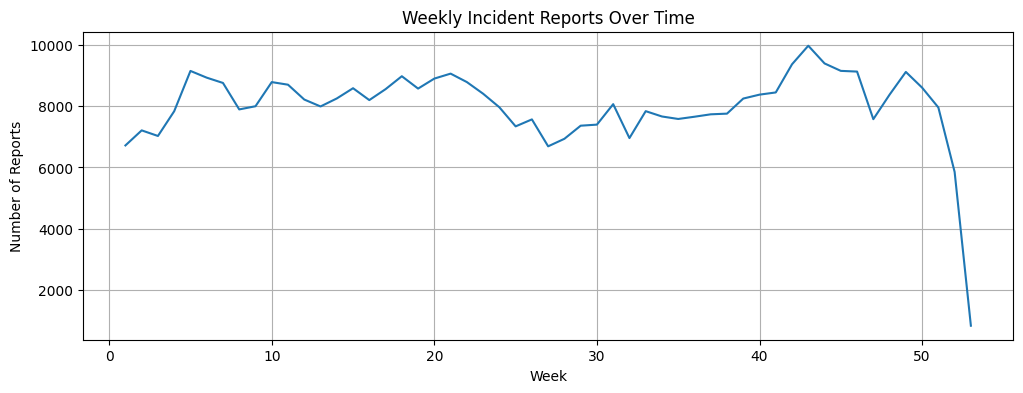

In [144]:
weekly_counts = df.groupby(df['Week']).size()
weekly_counts.plot(figsize=(12, 4), title="Weekly Incident Reports Over Time")
plt.xlabel("Week")
plt.ylabel("Number of Reports")
plt.grid(True)
plt.show()



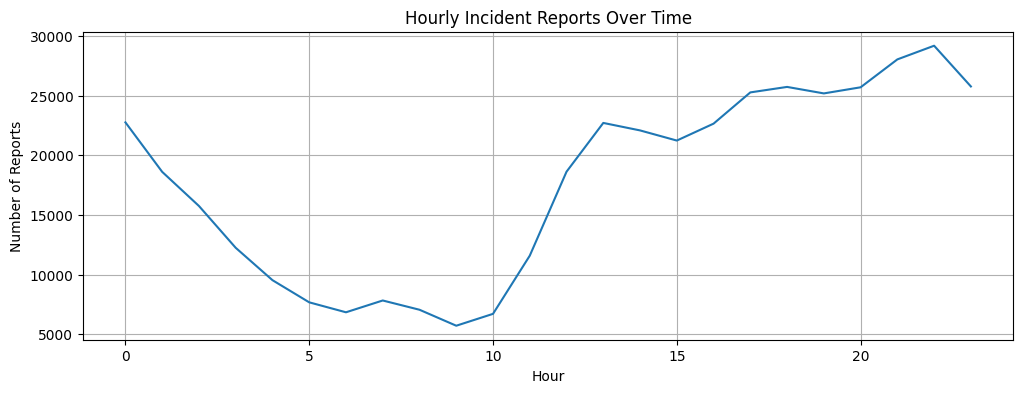

In [145]:
hourly_counts = df.groupby(df['Hour']).size()
hourly_counts.plot(figsize=(12, 4), title="Hourly Incident Reports Over Time")
plt.xlabel("Hour")
plt.ylabel("Number of Reports")
plt.grid(True)
plt.show()



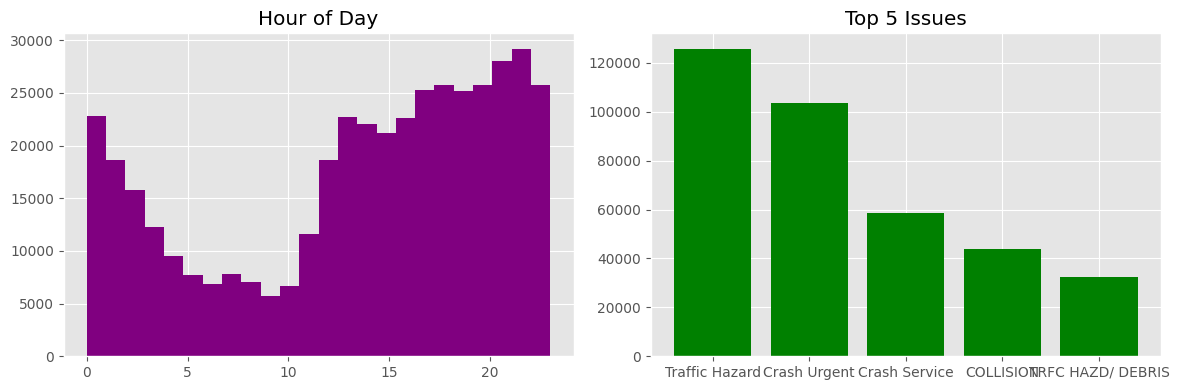

In [148]:
## Add Style
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(df['Hour'], bins=24, color='purple')
axs[0].set_title("Hour of Day")

axs[1].bar(top_issues.index, top_issues.values, color='green')
axs[1].set_title("Top 5 Issues")

plt.tight_layout()
plt.show()


In [149]:
grid_size = 0.01  # ~1 km depending on location


In [152]:
import numpy as np

df['lat_bin'] = (df['Latitude'] // grid_size) * grid_size
df['lon_bin'] = (df['Longitude'] // grid_size) * grid_size


In [153]:
grid_counts = df.groupby(['lat_bin', 'lon_bin']).size().reset_index(name='count')


In [154]:
print(grid_counts.head())


   lat_bin  lon_bin  count
0     30.0   -97.88      1
1     30.0   -97.87      1
2     30.0   -97.75      1
3     30.0   -97.74      2
4     30.0   -97.73      6


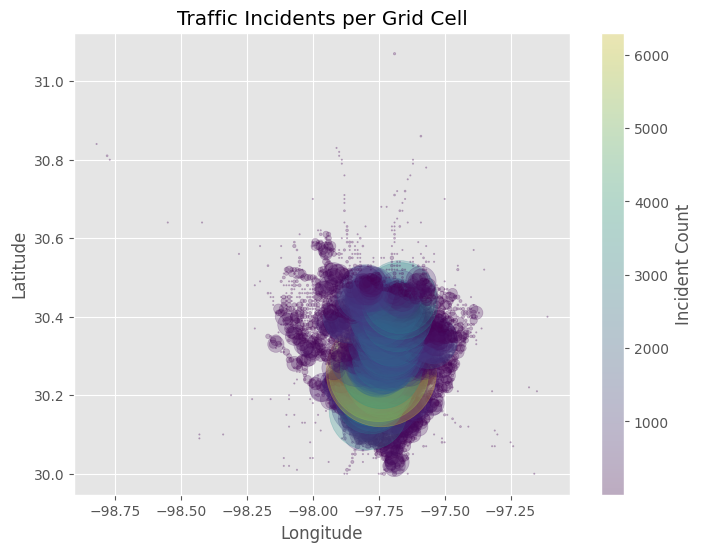

In [187]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(grid_counts['lon_bin'], grid_counts['lat_bin'],
            s=grid_counts['count'],  # size by count
            c=grid_counts['count'], cmap='viridis', alpha=.25)
plt.colorbar(label='Incident Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Incidents per Grid Cell')
plt.show()


In [159]:
df.dtypes

Traffic Report ID                 object
Published Date                    object
Issue Reported            string[python]
Location                          object
Latitude                         float64
Longitude                        float64
Address                           object
Status                            object
Status Date                       object
Agency                            object
date                 datetime64[ns, UTC]
year                               int32
Issue Lower                       object
Date                 datetime64[ns, UTC]
Month                              int32
Hour                               int32
Week                              UInt32
lat_bin                          float64
lon_bin                          float64
dtype: object

In [160]:
df['Address'].head(10)


0    E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...
1                                 8024 N Ih 35 Svrd Sb
2                                       12400 Glass Rd
3    S Sh 45 W Eb & S Sh 45 W Eb To Bliss Spillar Ramp
4                       Anderson Mill Rd & N Fm 620 Rd
5                             665 W FM 1626 TO STATION
6                                 2787 S Lakeline Blvd
7                                     15700 N Ih 35 Nb
8                            7513 MC KINNEY FALLS PKWY
9                      E 7th St / N Pleasant Valley Rd
Name: Address, dtype: object

In [162]:
intersections_df = df[df['Address'].str.contains('/', na=False)]

In [163]:
intersections_df.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower,Date,Month,Hour,Week,lat_bin,lon_bin
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,2024-03-06 01:29:39+00:00,2024,stalled vehicle,2024-03-06 01:29:39+00:00,3,1,10,30.32,-97.71
9,619683DB9EF9D4649743EE1DEDDB3923D6E5F704_17096...,03/06/2024 02:27:05 AM +0000,Traffic Hazard,POINT (-97.709495 30.260127),30.260127,-97.709495,E 7th St / N Pleasant Valley Rd,ARCHIVED,03/06/2024 03:20:11 AM +0000,AUSTIN PD,2024-03-06 02:27:05+00:00,2024,traffic hazard,2024-03-06 02:27:05+00:00,3,2,10,30.26,-97.71
12,9521E2BCC9C0DE945CCF68B52345097002B66BA5_17096...,03/06/2024 02:45:22 AM +0000,Crash Urgent,POINT (-97.774813 30.20489),30.204890,-97.774813,S Congress Ave / W Stassney Ln,ARCHIVED,03/06/2024 03:25:10 AM +0000,AUSTIN PD,2024-03-06 02:45:22+00:00,2024,crash urgent,2024-03-06 02:45:22+00:00,3,2,10,30.20,-97.78
19,A4DE97E713F1A7CD2CE310637380FD3E9881BBB6_17080...,02/15/2024 10:25:50 PM +0000,Crash Urgent,POINT (-97.743908 30.21963),30.219630,-97.743908,Woodward St / Parker Ln,ARCHIVED,02/15/2024 11:39:08 PM +0000,AUSTIN PD,2024-02-15 22:25:50+00:00,2024,crash urgent,2024-02-15 22:25:50+00:00,2,22,7,30.21,-97.75
32,870F1BF229DA5EB26E5E5A7C1D69D9451FA7906A_17096...,03/05/2024 11:58:24 PM +0000,Stalled Vehicle,POINT (-97.798891 30.174101),30.174101,-97.798891,S 1st St / Ralph Ablanedo Dr,ARCHIVED,03/06/2024 12:30:12 AM +0000,AUSTIN PD,2024-03-05 23:58:24+00:00,2024,stalled vehicle,2024-03-05 23:58:24+00:00,3,23,10,30.17,-97.80


In [165]:
intersections_df['intersection'] = (
    intersections_df['Address']
    .str.replace(r'\s*/\s*', ' / ', regex=True)  # clean spacing around slashes
    .str.lower()
)


/tmp/ipykernel_288248/4023229340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersections_df['intersection'] = (


In [166]:
intersections_df

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,Agency,date,year,Issue Lower,Date,Month,Hour,Week,lat_bin,lon_bin,intersection
0,F350D780EA8AAA48030B4DB64F790C14DBCD757F_17096...,03/06/2024 01:29:39 AM +0000,Stalled Vehicle,POINT (-97.705874 30.32358),30.323580,-97.705874,E 290 Svrd Wb To Ih 35 Nb Ramp / N Ih 35 Svrd ...,ARCHIVED,03/06/2024 02:10:12 AM +0000,AUSTIN PD,2024-03-06 01:29:39+00:00,2024,stalled vehicle,2024-03-06 01:29:39+00:00,3,1,10,30.32,-97.71,e 290 svrd wb to ih 35 nb ramp / n ih 35 svrd ...
9,619683DB9EF9D4649743EE1DEDDB3923D6E5F704_17096...,03/06/2024 02:27:05 AM +0000,Traffic Hazard,POINT (-97.709495 30.260127),30.260127,-97.709495,E 7th St / N Pleasant Valley Rd,ARCHIVED,03/06/2024 03:20:11 AM +0000,AUSTIN PD,2024-03-06 02:27:05+00:00,2024,traffic hazard,2024-03-06 02:27:05+00:00,3,2,10,30.26,-97.71,e 7th st / n pleasant valley rd
12,9521E2BCC9C0DE945CCF68B52345097002B66BA5_17096...,03/06/2024 02:45:22 AM +0000,Crash Urgent,POINT (-97.774813 30.20489),30.204890,-97.774813,S Congress Ave / W Stassney Ln,ARCHIVED,03/06/2024 03:25:10 AM +0000,AUSTIN PD,2024-03-06 02:45:22+00:00,2024,crash urgent,2024-03-06 02:45:22+00:00,3,2,10,30.20,-97.78,s congress ave / w stassney ln
19,A4DE97E713F1A7CD2CE310637380FD3E9881BBB6_17080...,02/15/2024 10:25:50 PM +0000,Crash Urgent,POINT (-97.743908 30.21963),30.219630,-97.743908,Woodward St / Parker Ln,ARCHIVED,02/15/2024 11:39:08 PM +0000,AUSTIN PD,2024-02-15 22:25:50+00:00,2024,crash urgent,2024-02-15 22:25:50+00:00,2,22,7,30.21,-97.75,woodward st / parker ln
32,870F1BF229DA5EB26E5E5A7C1D69D9451FA7906A_17096...,03/05/2024 11:58:24 PM +0000,Stalled Vehicle,POINT (-97.798891 30.174101),30.174101,-97.798891,S 1st St / Ralph Ablanedo Dr,ARCHIVED,03/06/2024 12:30:12 AM +0000,AUSTIN PD,2024-03-05 23:58:24+00:00,2024,stalled vehicle,2024-03-05 23:58:24+00:00,3,23,10,30.17,-97.80,s 1st st / ralph ablanedo dr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425617,FFEEAE89101150B85AC054F8625E928F11D2FBB0_17496...,06/11/2025 07:50:06 AM +0000,Crash Urgent,POINT (-97.816338 30.185877),30.185877,-97.816338,Menchaca Rd / Davis Ln,ARCHIVED,06/11/2025 10:20:13 AM +0000,AUSTIN PD,2025-06-11 07:50:06+00:00,2025,crash urgent,2025-06-11 07:50:06+00:00,6,7,24,30.18,-97.82,menchaca rd / davis ln
425620,5D1BDAE6389C2A1988415D2F9B9EC2070341371D_17496...,06/11/2025 10:45:48 AM +0000,COLLISION,POINT (-97.648556 30.161011),30.161011,-97.648556,Apperson St / Elroy Rd,ARCHIVED,06/11/2025 11:45:19 AM +0000,TRAVIS COUNTY SHERIF,2025-06-11 10:45:48+00:00,2025,collision,2025-06-11 10:45:48+00:00,6,10,24,30.16,-97.65,apperson st / elroy rd
425621,826AAE5B885CCF85B24973420339AB023B567B4E_17496...,06/11/2025 10:56:14 AM +0000,COLLISION,POINT (-97.637747 30.210222),30.210222,-97.637747,Tesla River Rd / S Fm 973 Rd,ARCHIVED,06/11/2025 12:40:22 PM +0000,TRAVIS COUNTY SHERIF,2025-06-11 10:56:14+00:00,2025,collision,2025-06-11 10:56:14+00:00,6,10,24,30.21,-97.64,tesla river rd / s fm 973 rd
425623,EBF5283D22437BB974F4248BA0EC4E90F26D32CB_17496...,06/11/2025 12:49:24 PM +0000,TRFC HAZD/ DEBRIS,POINT (-97.538529 30.349397),30.349397,-97.538529,N Fm 973 Rd / E Us 290 Hwy Wb,ARCHIVED,06/11/2025 01:00:48 PM +0000,TRAVIS COUNTY SHERIF,2025-06-11 12:49:24+00:00,2025,trfc hazd/ debris,2025-06-11 12:49:24+00:00,6,12,24,30.34,-97.54,n fm 973 rd / e us 290 hwy wb


In [173]:
top_intersections = (
    intersections_df['intersection']
    .value_counts()
    .reset_index()
#    .rename(columns={'index': 'intersection', 'intersection': 'count'})
)

In [174]:
print(top_intersections)
print(top_intersections.dtypes)

                                  intersection  count
0                      fm 969 rd / n fm 973 rd     66
1                      e parmer ln / dessau rd     65
2                      dessau rd / e parmer ln     64
3          n ih 35 svrd nb / grand avenue pkwy     58
4                 w slaughter ln / menchaca rd     52
...                                        ...    ...
8585        crest top bnd / steiner ranch blvd      1
8586        spicewood club dr / mandeville cir      1
8587     tinnin ford rd / south lakeshore blvd      1
8588  s sh 130 sb / s sh 130 sb to fm 812 ramp      1
8589             distribution dr / burleson rd      1

[8590 rows x 2 columns]
intersection    object
count            int64
dtype: object


In [175]:
top_names = top_intersections['intersection'].head(10)
top_coords = (
    intersections_df[intersections_df['intersection'].isin(top_names)]
    .groupby('intersection')[['Latitude', 'Longitude']]
    .median()
    .reset_index()
)

In [176]:
top_coords

,intersection,Latitude,Longitude
0,anderson mill rd / n fm 620 rd,30.455444,-97.825791
1,dessau rd / e parmer ln,30.386857,-97.648566
2,e braker ln / dessau rd,30.377191,-97.658666
3,e parmer ln / dessau rd,30.386857,-97.648566
4,fm 969 rd / n fm 973 rd,30.256997,-97.611818
5,n fm 620 rd / anderson mill rd,30.455444,-97.825791
6,n ih 35 svrd nb / grand avenue pkwy,30.456161,-97.665638
7,n lamar blvd / w rundberg ln,30.363067,-97.697058
8,w braker ln / n lamar blvd,30.381876,-97.686405
9,w slaughter ln / menchaca rd,30.173649,-97.823834


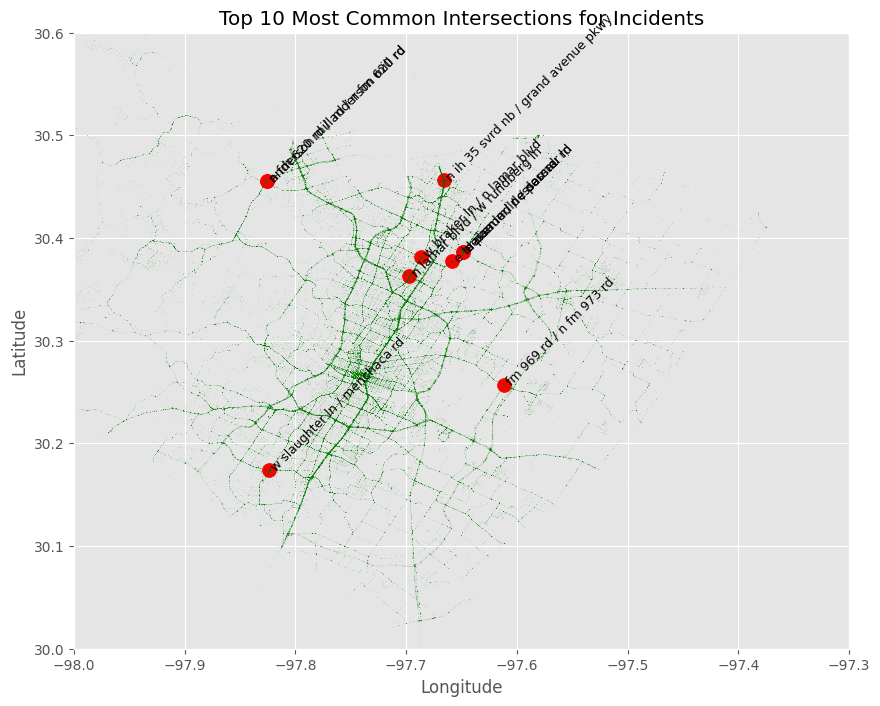

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(top_coords['Longitude'], top_coords['Latitude'], s=100, c='red')
plt.scatter(df['Longitude'], df['Latitude'], alpha=.3, s=.001, c='green')

# Label each point
for _, row in top_coords.iterrows():
    plt.text(row['Longitude'], row['Latitude'], row['intersection'], fontsize=9, rotation=45)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-98, -97.3)
plt.ylim(30,30.6)
plt.title('Top 10 Most Common Intersections for Incidents')
plt.grid(True)
plt.show()